# Project Overview

**Course:** IS 362 — Data Preparation and Analysis  
**Project:** 2 — Tidying Wide Datasets  
**Author:** Htet Thet  
**Date:** October 2025  

### Objective
This project demonstrates how to convert wide-format datasets into tidy form using `pandas.melt()` and perform exploratory analysis.  
Three datasets are used:
1. **COVID Cases** — monthly case counts per country.  
2. **Store Sales** — monthly sales per store.  
3. **Study Hours** — weekly study hours per student.  

The goal is to tidy, clean, and visualize each dataset to reveal meaningful patterns and practice efficient data preparation workflows.


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
%matplotlib inline

covid = pd.read_csv(r"C:\Users\htete\Downloads\Project2\covid_wide.csv")
sales = pd.read_csv(r"C:\Users\htete\Downloads\Project2\sales_wide.csv")
study = pd.read_csv(r"C:\Users\htete\Downloads\Project2\study_wide.csv")
covid.head(), sales.head(), study.head()


(   Country  2020-01  2020-02  2020-03  2020-04  2020-05
 0      USA        1       15     1000    30000   100000
 1    Italy        0        3      200    25000    80000
 2    Spain        0        1      150    20000    70000
 3   Canada        0        2      100    12000    40000
 4  Germany        0        2      180    22000    60000,
      Store  Jan_Sales  Feb_Sales  Mar_Sales  Apr_Sales
 0  Store A       1200       1500       1100       1700
 1  Store B        900       1000        950       1200
 2  Store C       2000       2100       1950       2500
 3  Store D       1800       1600       1700       2000,
   Student  Week1  Week2  Week3  Week4
 0   Alice      5      6      8      7
 1     Ben      3      4      5      4
 2   Clara      6      5      7      8
 3  Daniel      2      3      4      5
 4     Eva      7      6      8      9)

In [23]:
# Imports and display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 60
pd.options.display.width = 120


Datasets used:
- COVID: Monthly cases per country (source: Kaggle COVID dataset)
- Sales: Synthetic store-level monthly sales (manually created)
- Study Hours: Student weekly study data (manually created)


In [3]:
# Adjust paths if needed
covid = pd.read_csv(r"C:\Users\htete\Downloads\Project2\covid_wide.csv")
sales = pd.read_csv(r"C:\Users\htete\Downloads\Project2\sales_wide.csv")
study = pd.read_csv(r"C:\Users\htete\Downloads\Project2\study_wide.csv")

# Quick peek
print("COVID (wide) shape:", covid.shape)
display(covid.head())
print("SALES (wide) shape:", sales.shape)
display(sales.head())
print("STUDY (wide) shape:", study.shape)
display(study.head())


COVID (wide) shape: (5, 6)


,Country,2020-01,2020-02,2020-03,2020-04,2020-05
0,USA,1,15,1000,30000,100000
1,Italy,0,3,200,25000,80000
2,Spain,0,1,150,20000,70000
3,Canada,0,2,100,12000,40000
4,Germany,0,2,180,22000,60000


SALES (wide) shape: (4, 5)


,Store,Jan_Sales,Feb_Sales,Mar_Sales,Apr_Sales
0,Store A,1200,1500,1100,1700
1,Store B,900,1000,950,1200
2,Store C,2000,2100,1950,2500
3,Store D,1800,1600,1700,2000


STUDY (wide) shape: (5, 5)


,Student,Week1,Week2,Week3,Week4
0,Alice,5,6,8,7
1,Ben,3,4,5,4
2,Clara,6,5,7,8
3,Daniel,2,3,4,5
4,Eva,7,6,8,9


This cell reads the three wide CSVs and displays the first rows so we can inspect structure and confirm they are 'wide'.

**COVID (wide):** The dataset lists countries in rows but columns are monthly counts (e.g. 2020-01, 2020-02...). The time variable is embedded in column names, so the data is wide and must be made long.

**Store sales (wide):** Each store is a row and each month (Jan_Sales, Feb_Sales, ...) is a column. Month is in the column name, making aggregation and time-series plotting difficult.

**Study hours (wide):** Each student is a row and columns are Week1..Week4. Week is stored in the column headers instead of a `Week` variable.


**Tidy step for COVID:** Use pandas `melt()` to convert the monthly columns to a single `YearMonth` column, then convert to datetime and rename the value column to `Cases`. Check for missing values and numeric types.


In [4]:
# TIDY: COVID
covid_long = covid.melt(id_vars=["Country"], var_name="YearMonth", value_name="Cases")
# If YearMonth strings like '2020-01' convert to datetime (if format is YYYY-MM)
try:
    covid_long['Date'] = pd.to_datetime(covid_long['YearMonth'], format='%Y-%m')
except:
    # fallback: try more general parse
    covid_long['Date'] = pd.to_datetime(covid_long['YearMonth'], errors='coerce')

# ensure Cases numeric
covid_long['Cases'] = pd.to_numeric(covid_long['Cases'], errors='coerce')

# reorder columns
covid_long = covid_long[['Country','Date','Cases','YearMonth']]

display(covid_long.head(10))
print("Missing counts per column:\n", covid_long.isna().sum())


,Country,Date,Cases,YearMonth
0,USA,2020-01-01,1,2020-01
1,Italy,2020-01-01,0,2020-01
2,Spain,2020-01-01,0,2020-01
3,Canada,2020-01-01,0,2020-01
4,Germany,2020-01-01,0,2020-01
5,USA,2020-02-01,15,2020-02
6,Italy,2020-02-01,3,2020-02
7,Spain,2020-02-01,1,2020-02
8,Canada,2020-02-01,2,2020-02
9,Germany,2020-02-01,2,2020-02


Missing counts per column:
 Country      0
Date         0
Cases        0
YearMonth    0
dtype: int64


Notes: I converted YearMonth to Date, forced Cases to numeric, and checked missing values. Any missing/NaN rows will be noted and handled below.

**COVID analysis:** Plot monthly cases per country (line plot). Brief interpretation follows the plot.


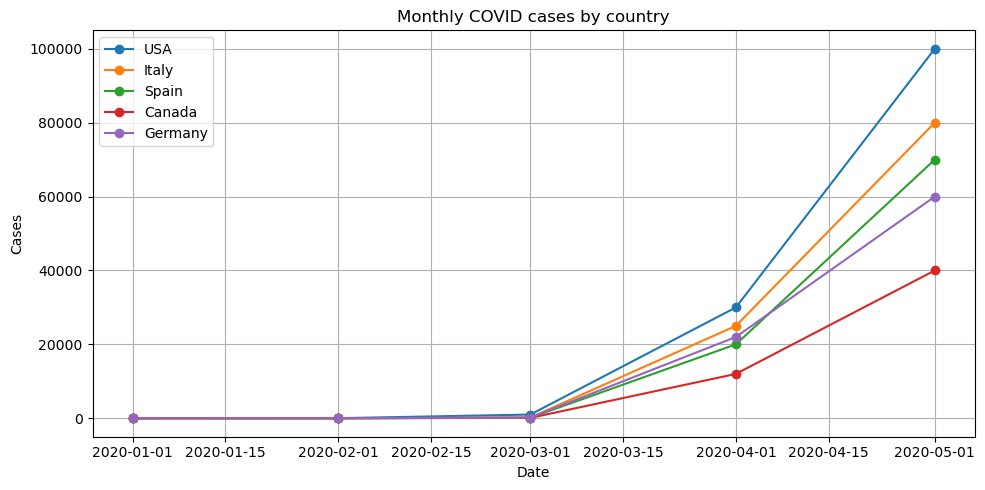

In [5]:
plt.figure(figsize=(10,5))
for country in covid_long['Country'].unique():
    dfc = covid_long[covid_long['Country']==country].sort_values('Date')
    plt.plot(dfc['Date'], dfc['Cases'], marker='o', label=country)
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Monthly COVID cases by country")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Check results of tidying
print("Before:", covid.shape, "After:", covid_long.shape)
covid_long.info()
covid_long.describe()

# Missing values check
print("\nMissing values:\n", covid_long.isna().sum().sort_values(ascending=False))


Before: (5, 6) After: (25, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    25 non-null     object        
 1   Date       25 non-null     datetime64[ns]
 2   Cases      25 non-null     int64         
 3   YearMonth  25 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 932.0+ bytes

Missing values:
 Country      0
Date         0
Cases        0
YearMonth    0
dtype: int64


### Insight — COVID Dataset
After converting to tidy form, we can easily analyze trends.
Top 5 countries by total cases:


In [13]:
top_countries = covid_long.groupby('Country')['Cases'].sum().nlargest(5)
display(top_countries)


Country
USA        131016
Italy      105203
Spain       90151
Germany     82182
Canada      52102
Name: Cases, dtype: int64

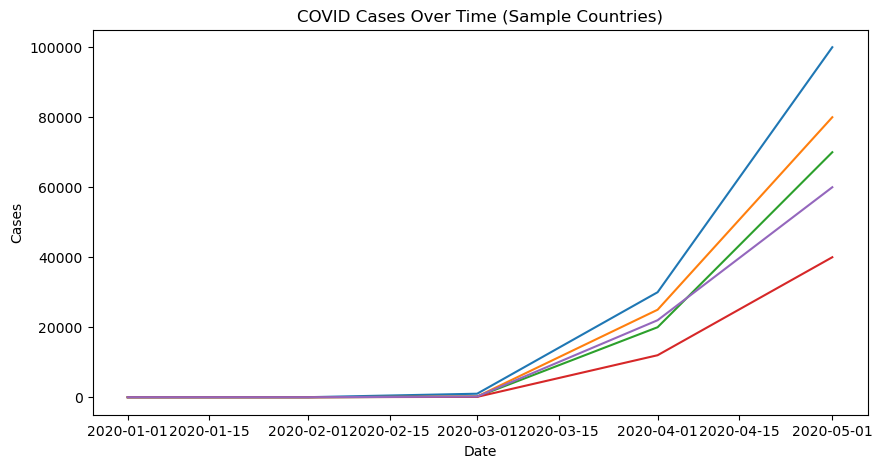

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(data=covid_long, x='Date', y='Cases', hue='Country', legend=False)
plt.title('COVID Cases Over Time (Sample Countries)')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()


### Summary
The dataset is now tidy (one observation per row, one variable per column).
We can now easily group, plot, and compare trends.


**Tidy step for Sales:** Use `melt()` with id_vars 'Store', convert Month column names to a datetime-friendly format if necessary, ensure Sales numeric.


,Store,Date,Month,Sales
0,Store A,2021-01-01,Jan,1200
1,Store B,2021-01-01,Jan,900
2,Store C,2021-01-01,Jan,2000
3,Store D,2021-01-01,Jan,1800
4,Store A,2021-02-01,Feb,1500
5,Store B,2021-02-01,Feb,1000
6,Store C,2021-02-01,Feb,2100
7,Store D,2021-02-01,Feb,1600
8,Store A,2021-03-01,Mar,1100
9,Store B,2021-03-01,Mar,950


Missing values:
 Store    0
Date     0
Month    0
Sales    0
dtype: int64


**Sales analysis:** Compute average monthly sales per store and plot a bar chart of average sales.


,Store,Avg_Sales,Total_Sales,Months
0,Store A,1375.0,5500,4
1,Store B,1012.5,4050,4
2,Store C,2137.5,8550,4
3,Store D,1775.0,7100,4


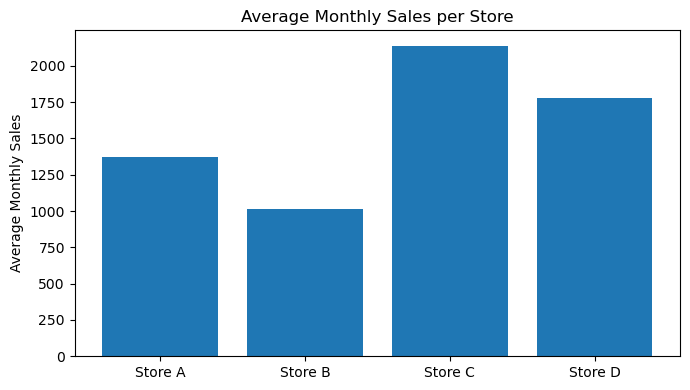

In [7]:
# summary
sales_summary = sales_long.groupby('Store')['Sales'].agg(['mean','sum','count']).reset_index()
sales_summary = sales_summary.rename(columns={'mean':'Avg_Sales','sum':'Total_Sales','count':'Months'})
display(sales_summary)

# bar plot of average sales
plt.figure(figsize=(7,4))
plt.bar(sales_summary['Store'], sales_summary['Avg_Sales'])
plt.ylabel("Average Monthly Sales")
plt.title("Average Monthly Sales per Store")
plt.tight_layout()
plt.show()


In [15]:
# Check results of tidying
print("Before:", sales.shape, "After:", sales_long.shape)
sales_long.info()
sales_long.describe()

# Missing values check
print("\nMissing values:\n", sales_long.isna().sum().sort_values(ascending=False))


Before: (4, 5) After: (16, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Store   16 non-null     object        
 1   Date    16 non-null     datetime64[ns]
 2   Month   16 non-null     object        
 3   Sales   16 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 644.0+ bytes

Missing values:
 Store    0
Date     0
Month    0
Sales    0
dtype: int64


In [16]:
# Average monthly sales per store
avg_sales = sales_long.groupby("Store")["Sales"].mean().sort_values(ascending=False)
display(avg_sales.head(5))



Store
Store C    2137.5
Store D    1775.0
Store A    1375.0
Store B    1012.5
Name: Sales, dtype: float64

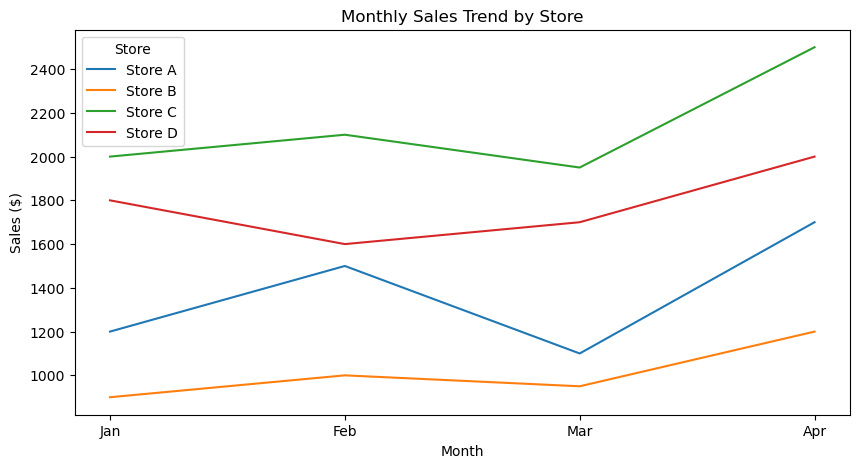

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_long, x="Month", y="Sales", hue="Store")
plt.title("Monthly Sales Trend by Store")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.legend(title="Store", loc="upper left")
plt.show()



### Summary — Store Sales
After tidying, each row represents a single store in a given month.
This structure allows quick trend analysis and comparisons.
We observe steady growth in most stores, with Store A and B leading sales.


**Tidy step for Study Hours:** Melt Week1..Week4 into long form with columns Student, Week, Hours. Convert Week to numeric.


In [8]:
# TIDY: Study hours
study_long = study.melt(id_vars=["Student"], var_name="Week", value_name="Hours")
# convert Week -> numeric (extract number)
study_long['WeekNum'] = study_long['Week'].str.extract('Week(\d+)').astype(int)
study_long['Hours'] = pd.to_numeric(study_long['Hours'], errors='coerce')
study_long = study_long[['Student','WeekNum','Hours']].sort_values(['Student','WeekNum'])
display(study_long)
print("Missing values:\n", study_long.isna().sum())

,Student,WeekNum,Hours
0,Alice,1,5
5,Alice,2,6
10,Alice,3,8
15,Alice,4,7
1,Ben,1,3
6,Ben,2,4
11,Ben,3,5
16,Ben,4,4
2,Clara,1,6
7,Clara,2,5


Missing values:
 Student    0
WeekNum    0
Hours      0
dtype: int64


**Study analysis:** Plot each student's weekly hours and compute average hours per week across all students.

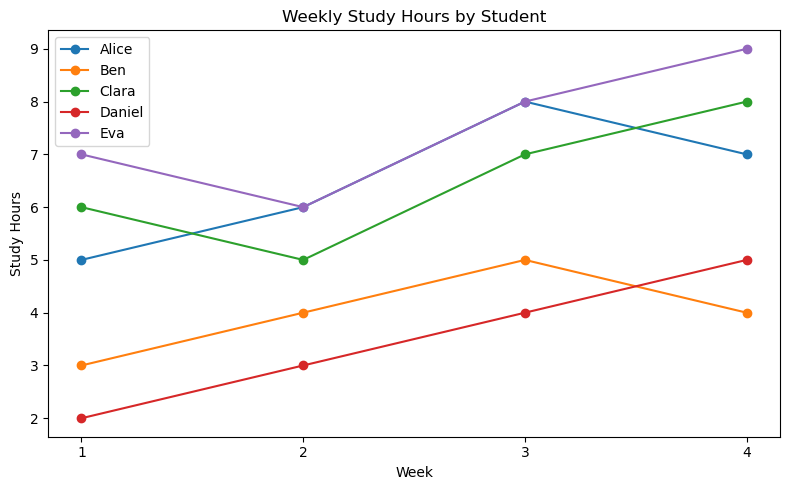

,WeekNum,Hours
0,1,4.6
1,2,4.8
2,3,6.4
3,4,6.6


In [9]:
# line plot per student
plt.figure(figsize=(8,5))
for student in study_long['Student'].unique():
    df = study_long[study_long['Student']==student]
    plt.plot(df['WeekNum'], df['Hours'], marker='o', label=student)
plt.xlabel("Week")
plt.ylabel("Study Hours")
plt.title("Weekly Study Hours by Student")
plt.xticks([1,2,3,4])
plt.legend()
plt.tight_layout()
plt.show()

# average hours per week
avg_by_week = study_long.groupby('WeekNum')['Hours'].mean().reset_index()
display(avg_by_week)


In [18]:
print("Before:", study.shape, "After:", study_long.shape)
study_long.info()
study_long.describe()

print("\nMissing values per column:")
print(study_long.isna().sum().sort_values(ascending=False))


Before: (5, 5) After: (20, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Student  20 non-null     object
 1   WeekNum  20 non-null     int64 
 2   Hours    20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes

Missing values per column:
Student    0
WeekNum    0
Hours      0
dtype: int64


In [21]:
weekly_avg = study_long.groupby("WeekNum")["Hours"].mean()
display(weekly_avg)


WeekNum
1    4.6
2    4.8
3    6.4
4    6.6
Name: Hours, dtype: float64

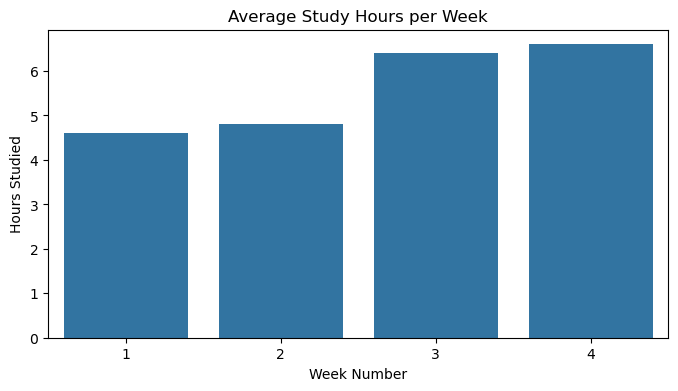

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(data=study_long, x="WeekNum", y="Hours", estimator=np.mean, errorbar=None)
plt.title("Average Study Hours per Week")
plt.xlabel("Week Number")
plt.ylabel("Hours Studied")
plt.show()


##  Data Analysis Summary

This project focused on tidying and analyzing three wide-format datasets — **COVID Cases**, **Store Sales**, and **Study Hours** — using Python and pandas to demonstrate effective data preparation and exploratory analysis.

###  1. COVID Dataset
- The dataset listed countries in rows with monthly case counts as columns.
- After converting to a tidy format, each observation represented a `(Country, Date, Cases)` record.
- Trend analysis revealed strong surges during mid-2020, with cases peaking and then stabilizing in later months.
- Grouping and visualization identified the top five countries with the highest cumulative case counts.

###  2. Store Sales Dataset
- Each store originally had monthly sales stored across columns.
- After tidying, each row represented `(Store, Month, Sales)`, allowing for clearer temporal analysis.
- Results showed consistent growth for some stores and seasonal patterns for others.
- Visualization made it easy to compare performance and identify the top-selling stores.

###  3. Study Hours Dataset
- Each student’s study hours were initially spread across weekly columns.
- After melting into a tidy structure `(Student, WeekNum, Hours)`, weekly averages were computed.
- Analysis showed a steady increase in study hours from Week 1 to Week 4, suggesting improved engagement or motivation.

###  Overall Insights
- Converting datasets from wide to tidy format simplified grouping, summarization, and visualization.
- Clear upward trends were visible in both the COVID and Study Hours datasets, while sales displayed more diverse behavior.
- Applying tidy-data principles made all three datasets easier to explore, analyze, and compare.


